In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.style.use('seaborn-darkgrid')

In [2]:
accuracy_exp = pd.read_csv('accuracy_exp.csv')
accuracy_exp.shape

(100, 13)

In [3]:
accuracy_exp1 = pd.read_csv('accuracy_exp1.csv')
accuracy_exp1.shape

(100, 19)

In [4]:
accuracy_combined = pd.concat([accuracy_exp, accuracy_exp1], axis=1, join="inner")
accuracy_combined.shape

(100, 32)

In [5]:
loss_exp = pd.read_csv('loss_exp.csv')
loss_exp.shape

(100, 13)

In [6]:
loss_exp1 = pd.read_csv('loss_exp1.csv')
loss_exp1.shape

(100, 19)

In [7]:
loss_combined = pd.concat([loss_exp, loss_exp1], axis=1, join="inner")
loss_combined = loss_combined.loc[:, ~loss_combined.columns.duplicated()]
loss_combined

,Epocs,softmax_avg,softmax_median,softmax_std,softmax_var,softmax_max,softmax_min,sigmoid_avg,sigmoid_median,sigmoid_std,...,sgd_std,sgd_var,sgd_max,sgd_min,sgd_lr_avg,sgd_lr_median,sgd_lr_std,sgd_lr_var,sgd_lr_max,sgd_lr_min
0,0,3.280537,3.274272,0.354235,0.125482,4.554461,2.676888,3.455427,3.414622,0.297850,...,0.052865,0.002795,4.554206,4.360330,3.863437,3.750205,0.243410,0.059248,4.553563,3.655340
1,1,2.222986,2.194451,0.281057,0.078993,3.266632,1.803421,2.436812,2.393014,0.302318,...,0.139434,0.019442,4.372358,3.888626,3.717391,3.715189,0.025509,0.000651,3.785994,3.622151
2,2,1.671975,1.659750,0.132260,0.017493,2.683015,1.483692,1.820975,1.807117,0.146787,...,0.044585,0.001988,3.971116,3.736848,3.701633,3.700334,0.027783,0.000772,3.774415,3.606480
3,3,1.453428,1.446275,0.094799,0.008987,2.346617,1.322200,1.553680,1.543002,0.094550,...,0.027900,0.000778,3.858807,3.679367,3.594177,3.589167,0.046897,0.002199,3.747667,3.476743
4,4,1.327703,1.323971,0.079810,0.006370,2.143283,1.226230,1.398881,1.394161,0.079311,...,0.025992,0.000676,3.819762,3.648281,3.509220,3.510547,0.037257,0.001388,3.708402,3.402219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.506978,0.502159,0.044237,0.001957,1.031381,0.466550,0.529068,0.525025,0.041634,...,0.032593,0.001062,3.544239,3.208166,1.722327,1.714399,0.104969,0.011019,2.973279,1.632621
96,96,0.505082,0.501910,0.043686,0.001908,1.020387,0.467103,0.527568,0.523673,0.042346,...,0.032909,0.001083,3.546117,3.204026,1.715961,1.707482,0.104480,0.010916,2.960815,1.623965
97,97,0.503820,0.498507,0.043003,0.001849,1.005529,0.462566,0.524860,0.521450,0.042255,...,0.033139,0.001098,3.547445,3.201499,1.707624,1.698982,0.104000,0.010816,2.945597,1.623706
98,98,0.503877,0.498381,0.044426,0.001974,1.030767,0.466169,0.525059,0.520912,0.041519,...,0.033019,0.001090,3.545005,3.203300,1.699342,1.690113,0.103109,0.010631,2.930192,1.613254


D:\apps\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\apps\Anaconda\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


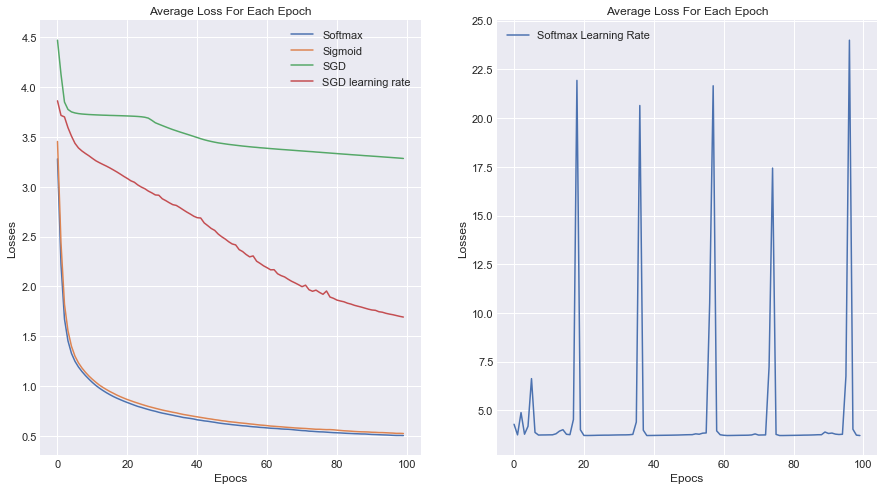

In [8]:
x= [i for i in range(0,100)]
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(x, loss_combined['softmax_avg'], label = "Softmax",)
plt.plot(x, loss_combined['sigmoid_avg'], label = "Sigmoid",)
plt.plot(x, loss_combined['sgd_avg'], label = "SGD", )
plt.plot(x, loss_combined['sgd_lr_avg'], label = "SGD learning rate")

plt.xlabel('Epocs')
plt.ylabel('Losses')
plt.title('Average Loss For Each Epoch')

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, loss_combined['softmax_lr_avg'], label = "Softmax Learning Rate")

plt.xlabel('Epocs')
plt.ylabel('Losses')
plt.title('Average Loss For Each Epoch')

plt.legend()
plt.show()

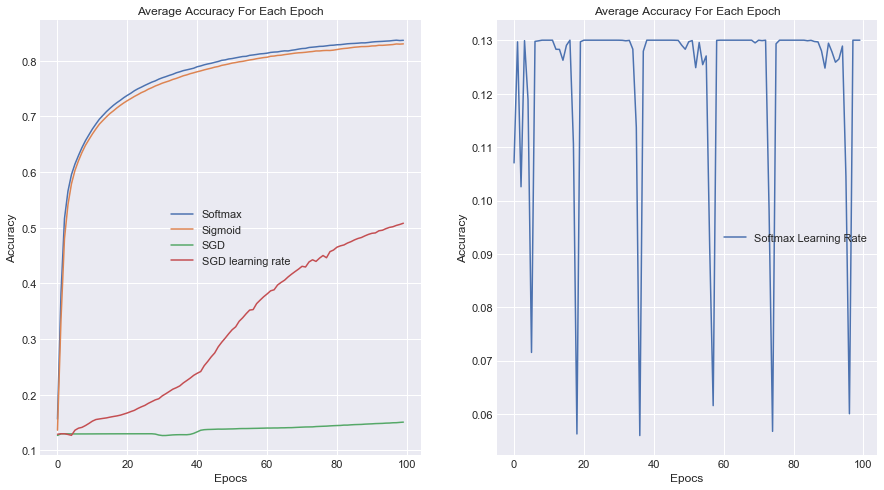

In [9]:
x= [i for i in range(0,100)]
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(x, accuracy_combined['softmax_avg'], label = "Softmax",)
plt.plot(x, accuracy_combined['sigmoid_avg'], label = "Sigmoid",)
plt.plot(x, accuracy_combined['sgd_avg'], label = "SGD", )
plt.plot(x, accuracy_combined['sgd_lr_avg'], label = "SGD learning rate")

plt.xlabel('Epocs')
plt.ylabel('Accuracy')
plt.title('Average Accuracy For Each Epoch')

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, accuracy_combined['softmax_lr_avg'], label = "Softmax Learning Rate")

plt.xlabel('Epocs')
plt.ylabel('Accuracy')
plt.title('Average Accuracy For Each Epoch')

plt.legend()
plt.show()

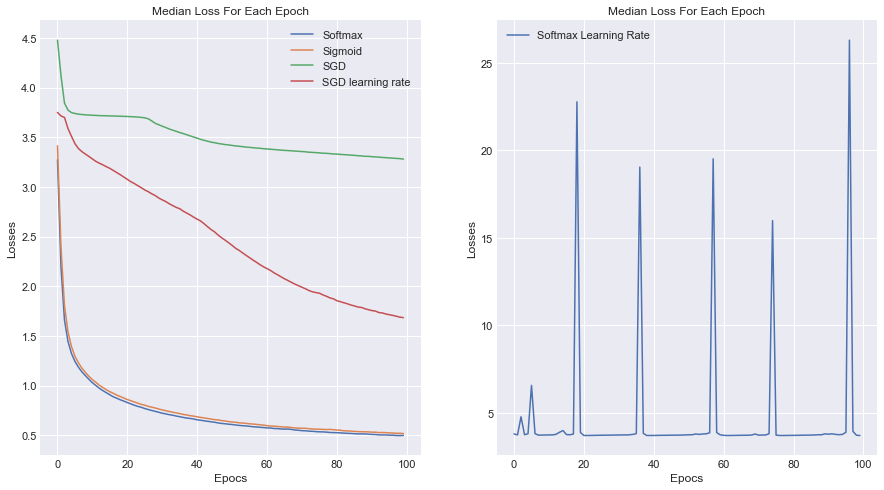

In [10]:
x= [i for i in range(0,100)]
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(x, loss_combined['softmax_median'], label = "Softmax",)
plt.plot(x, loss_combined['sigmoid_median'], label = "Sigmoid",)
plt.plot(x, loss_combined['sgd_median'], label = "SGD", )
plt.plot(x, loss_combined['sgd_lr_median'], label = "SGD learning rate")

plt.xlabel('Epocs')
plt.ylabel('Losses')
plt.title('Median Loss For Each Epoch')

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, loss_combined['softmax_lr_median'], label = "Softmax Learning Rate")

plt.xlabel('Epocs')
plt.ylabel('Losses')
plt.title('Median Loss For Each Epoch')

plt.legend()
plt.show()

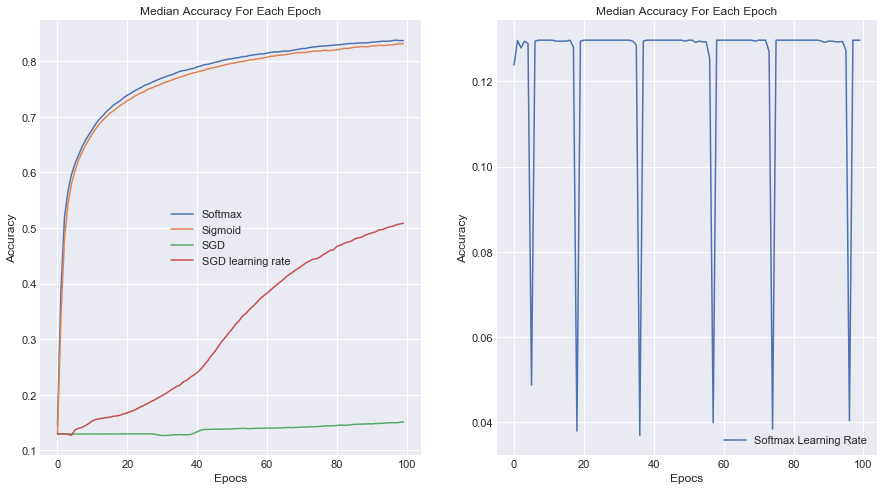

In [11]:
x= [i for i in range(0,100)]
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(x, accuracy_combined['softmax_median'], label = "Softmax",)
plt.plot(x, accuracy_combined['sigmoid_median'], label = "Sigmoid",)
plt.plot(x, accuracy_combined['sgd_median'], label = "SGD", )
plt.plot(x, accuracy_combined['sgd_lr_median'], label = "SGD learning rate")

plt.xlabel('Epocs')
plt.ylabel('Accuracy')
plt.title('Median Accuracy For Each Epoch')

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, accuracy_combined['softmax_lr_median'], label = "Softmax Learning Rate")

plt.xlabel('Epocs')
plt.ylabel('Accuracy')
plt.title('Median Accuracy For Each Epoch')

plt.legend()
plt.show()

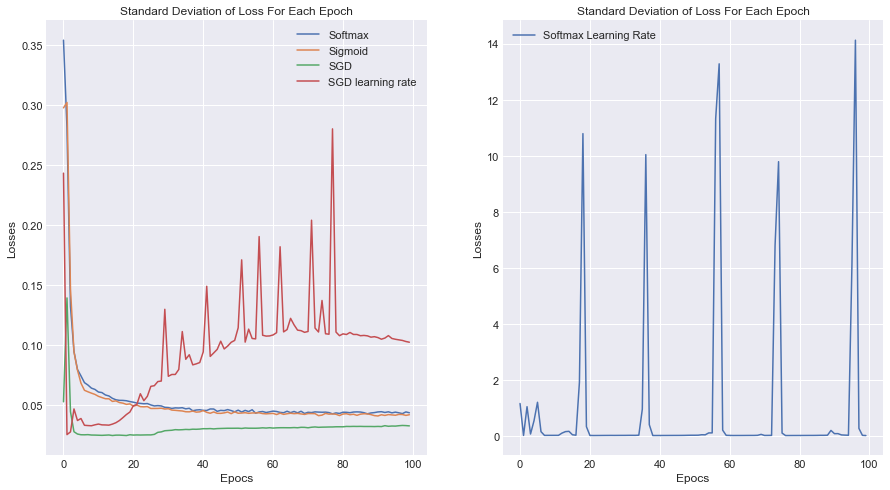

In [12]:
x= [i for i in range(0,100)]
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(x, loss_combined['softmax_std'], label = "Softmax",)
plt.plot(x, loss_combined['sigmoid_std'], label = "Sigmoid",)
plt.plot(x, loss_combined['sgd_std'], label = "SGD", )
plt.plot(x, loss_combined['sgd_lr_std'], label = "SGD learning rate")

plt.xlabel('Epocs')
plt.ylabel('Losses')
plt.title('Standard Deviation of Loss For Each Epoch')

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, loss_combined['softmax_lr_std'], label = "Softmax Learning Rate")

plt.xlabel('Epocs')
plt.ylabel('Losses')
plt.title('Standard Deviation of Loss For Each Epoch')

plt.legend()
plt.show()

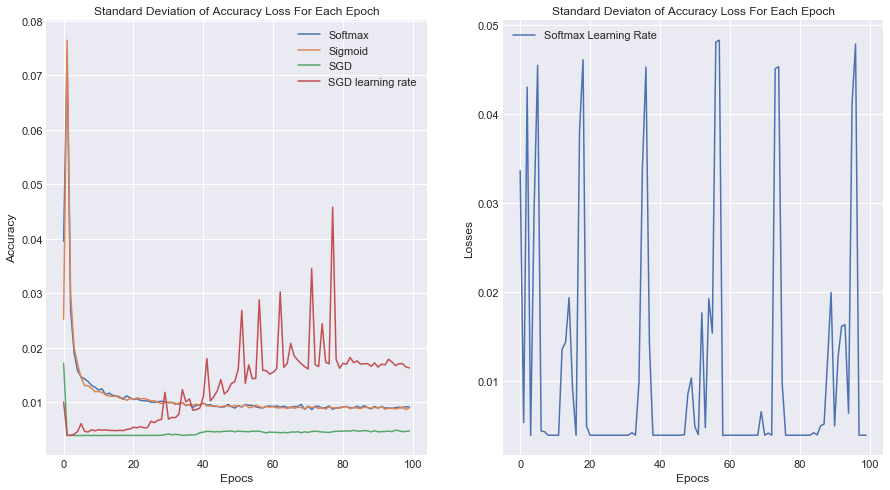

In [13]:
x= [i for i in range(0,100)]
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(x, accuracy_combined['softmax_std'], label = "Softmax",)
plt.plot(x, accuracy_combined['sigmoid_std'], label = "Sigmoid",)
plt.plot(x, accuracy_combined['sgd_std'], label = "SGD", )
plt.plot(x, accuracy_combined['sgd_lr_std'], label = "SGD learning rate")

plt.xlabel('Epocs')
plt.ylabel('Accuracy')
plt.title('Standard Deviation of Accuracy Loss For Each Epoch')

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, accuracy_combined['softmax_lr_std'], label = "Softmax Learning Rate")

plt.xlabel('Epocs')
plt.ylabel('Losses')
plt.title('Standard Deviaton of Accuracy Loss For Each Epoch')

plt.legend()
plt.show()

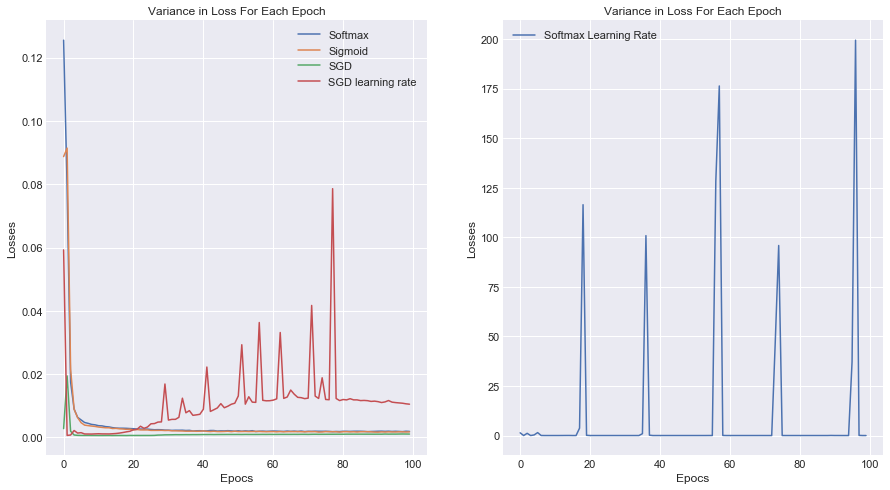

In [14]:
x= [i for i in range(0,100)]
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(x, loss_combined['softmax_var'], label = "Softmax",)
plt.plot(x, loss_combined['sigmoid_var'], label = "Sigmoid",)
plt.plot(x, loss_combined['sgd_var'], label = "SGD", )
plt.plot(x, loss_combined['sgd_lr_var'], label = "SGD learning rate")

plt.xlabel('Epocs')
plt.ylabel('Losses')
plt.title('Variance in Loss For Each Epoch')

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, loss_combined['softmax_lr_var'], label = "Softmax Learning Rate")

plt.xlabel('Epocs')
plt.ylabel('Losses')
plt.title('Variance in Loss For Each Epoch')

plt.legend()
plt.show()

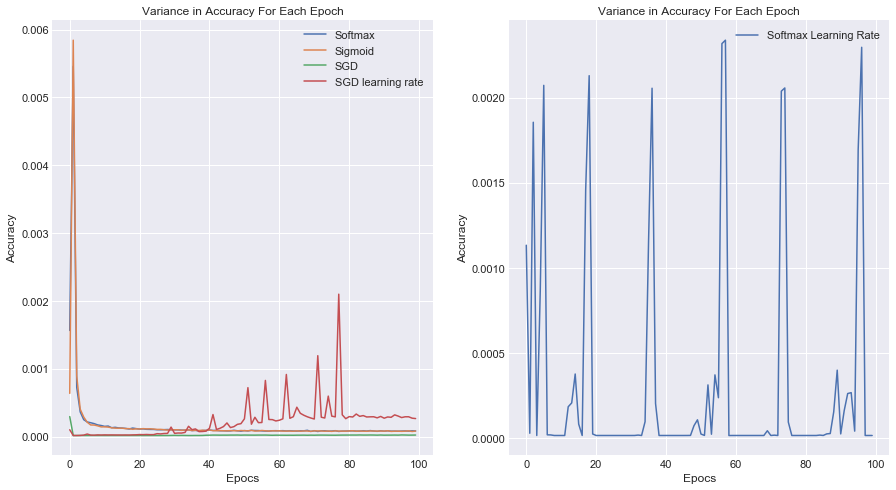

In [15]:
x= [i for i in range(0,100)]
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(x, accuracy_combined['softmax_var'], label = "Softmax",)
plt.plot(x, accuracy_combined['sigmoid_var'], label = "Sigmoid",)
plt.plot(x, accuracy_combined['sgd_var'], label = "SGD", )
plt.plot(x, accuracy_combined['sgd_lr_var'], label = "SGD learning rate")

plt.xlabel('Epocs')
plt.ylabel('Accuracy')
plt.title('Variance in Accuracy For Each Epoch')

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, accuracy_combined['softmax_lr_var'], label = "Softmax Learning Rate")

plt.xlabel('Epocs')
plt.ylabel('Accuracy')
plt.title('Variance in Accuracy For Each Epoch')

plt.legend()
plt.show()

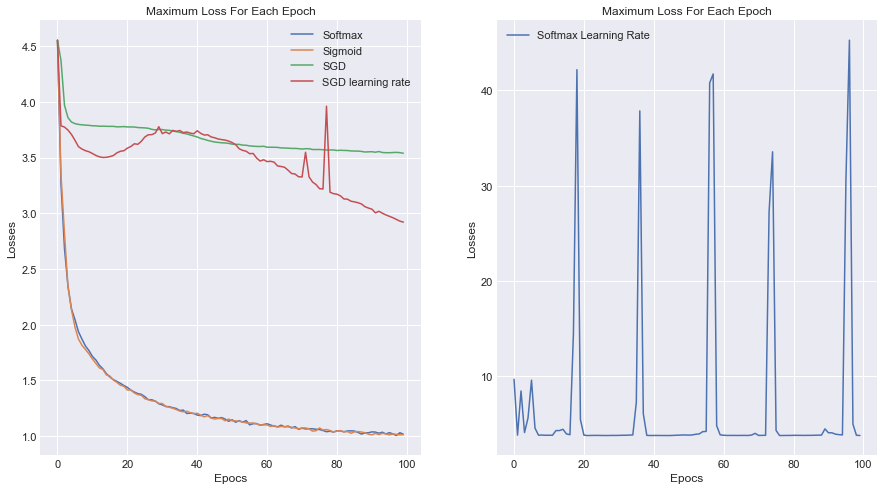

In [16]:
x= [i for i in range(0,100)]
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(x, loss_combined['softmax_max'], label = "Softmax",)
plt.plot(x, loss_combined['sigmoid_max'], label = "Sigmoid",)
plt.plot(x, loss_combined['sgd_max'], label = "SGD", )
plt.plot(x, loss_combined['sgd_lr_max'], label = "SGD learning rate")

plt.xlabel('Epocs')
plt.ylabel('Losses')
plt.title('Maximum Loss For Each Epoch')

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, loss_combined['softmax_lr_max'], label = "Softmax Learning Rate")

plt.xlabel('Epocs')
plt.ylabel('Losses')
plt.title('Maximum Loss For Each Epoch')

plt.legend()
plt.show()

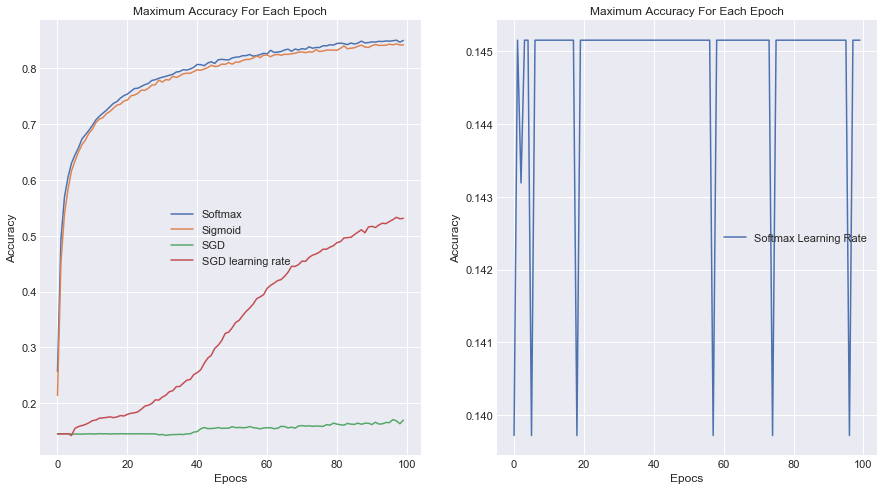

In [17]:
x= [i for i in range(0,100)]
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(x, accuracy_combined['softmax_max'], label = "Softmax",)
plt.plot(x, accuracy_combined['sigmoid_max'], label = "Sigmoid",)
plt.plot(x, accuracy_combined['sgd_max'], label = "SGD", )
plt.plot(x, accuracy_combined['sgd_lr_max'], label = "SGD learning rate")

plt.xlabel('Epocs')
plt.ylabel('Accuracy')
plt.title('Maximum Accuracy For Each Epoch')

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, accuracy_combined['softmax_lr_max'], label = "Softmax Learning Rate")

plt.xlabel('Epocs')
plt.ylabel('Accuracy')
plt.title('Maximum Accuracy For Each Epoch')

plt.legend()
plt.show()

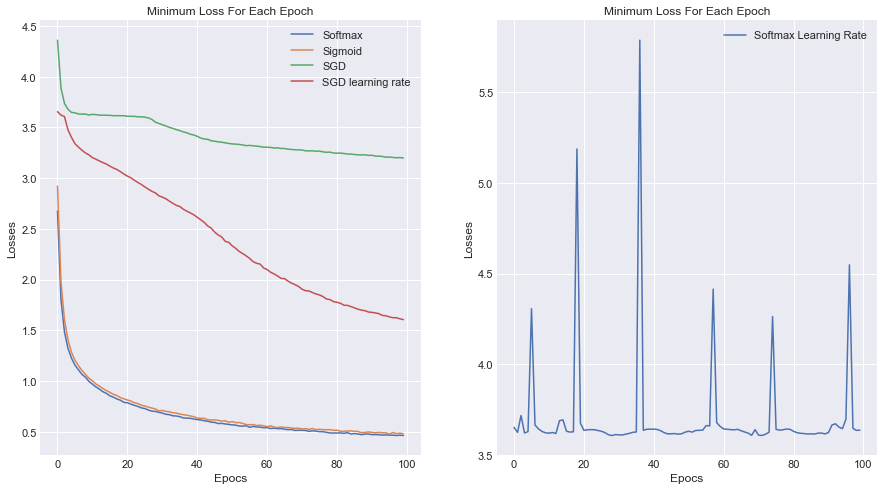

In [18]:
x= [i for i in range(0,100)]
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(x, loss_combined['softmax_min'], label = "Softmax",)
plt.plot(x, loss_combined['sigmoid_min'], label = "Sigmoid",)
plt.plot(x, loss_combined['sgd_min'], label = "SGD", )
plt.plot(x, loss_combined['sgd_lr_min'], label = "SGD learning rate")

plt.xlabel('Epocs')
plt.ylabel('Losses')
plt.title('Minimum Loss For Each Epoch')

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, loss_combined['softmax_lr_min'], label = "Softmax Learning Rate")

plt.xlabel('Epocs')
plt.ylabel('Losses')
plt.title('Minimum Loss For Each Epoch')

plt.legend()
plt.show()

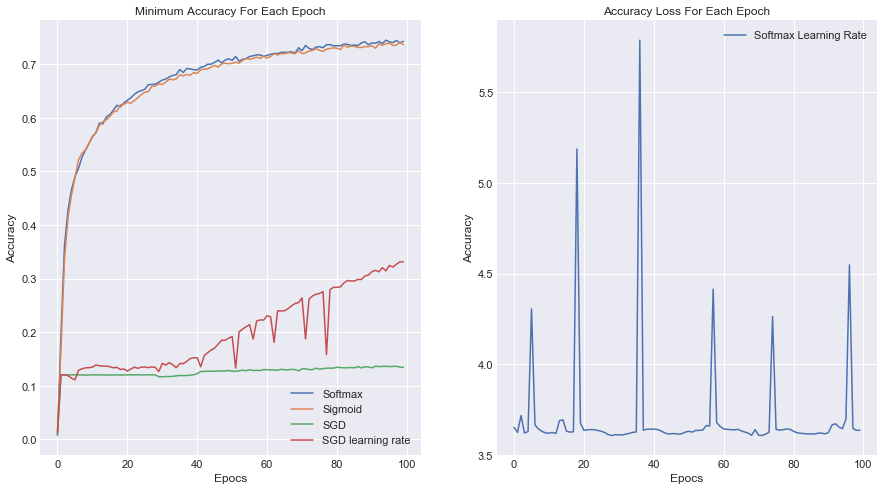

In [19]:
x= [i for i in range(0,100)]
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(x, accuracy_combined['softmax_min'], label = "Softmax",)
plt.plot(x, accuracy_combined['sigmoid_min'], label = "Sigmoid",)
plt.plot(x, accuracy_combined['sgd_min'], label = "SGD", )
plt.plot(x, accuracy_combined['sgd_lr_min'], label = "SGD learning rate")

plt.xlabel('Epocs')
plt.ylabel('Accuracy')
plt.title('Minimum Accuracy For Each Epoch')

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, loss_combined['softmax_lr_min'], label = "Softmax Learning Rate")

plt.xlabel('Epocs')
plt.ylabel('Accuracy')
plt.title('Accuracy Loss For Each Epoch')

plt.legend()
plt.show()

In [20]:
loss_combined[['softmax_avg','sigmoid_avg','sgd_avg','sgd_lr_avg','softmax_lr_avg']].describe()

,softmax_avg,sigmoid_avg,sgd_avg,sgd_lr_avg,softmax_lr_avg
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.735753,0.768414,3.502869,2.499134,4.829625
std,0.371995,0.397156,0.200783,0.592893,3.887152
min,0.503081,0.523581,3.284772,1.692460,3.712902
25%,0.542025,0.566029,3.348789,1.953374,3.728341
50%,0.614250,0.640998,3.423900,2.437614,3.745931
75%,0.777287,0.808585,3.699675,2.985025,3.822552
max,3.280537,3.455427,4.472137,3.863437,23.995799


In [21]:
accuracy_combined[['softmax_avg','sigmoid_avg','sgd_avg','sgd_lr_avg','softmax_lr_avg']].describe()

,softmax_avg,sigmoid_avg,sgd_avg,sgd_lr_avg,softmax_lr_avg
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.769841,0.760512,0.137365,0.313385,0.123424
std,0.097793,0.101773,0.007350,0.132317,0.017492
min,0.156324,0.136400,0.126847,0.127219,0.055978
25%,0.755020,0.744807,0.129920,0.180320,0.128330
50%,0.803629,0.795093,0.138673,0.313281,0.130007
75%,0.825259,0.817636,0.143029,0.443279,0.130038
max,0.837003,0.830373,0.150919,0.508217,0.130038


In [22]:
loss_combined[['softmax_median','sigmoid_median','sgd_median','sgd_lr_median','softmax_lr_median']].describe()

,softmax_median,sigmoid_median,sgd_median,sgd_lr_median,softmax_lr_median
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.730953,0.763683,3.500095,2.487714,4.644492
std,0.370594,0.392447,0.201331,0.593242,3.802489
min,0.498381,0.518333,3.280851,1.685055,3.708925
25%,0.537246,0.562189,3.345650,1.935490,3.724345
50%,0.610862,0.636803,3.420958,2.425232,3.741331
75%,0.772980,0.806025,3.697232,2.975642,3.796655
max,3.274272,3.414622,4.477925,3.750205,26.292023


In [23]:
accuracy_combined[['softmax_median','sigmoid_median','sgd_median','sgd_lr_median','softmax_lr_median']].describe()

,softmax_median,sigmoid_median,sgd_median,sgd_lr_median,softmax_lr_median
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.770567,0.761226,0.137221,0.314838,0.124056
std,0.098254,0.101938,0.007472,0.133095,0.021280
min,0.145229,0.129604,0.126661,0.127189,0.036911
25%,0.755907,0.745452,0.129510,0.180971,0.129453
50%,0.804272,0.795743,0.138511,0.314764,0.129680
75%,0.826332,0.818293,0.142833,0.445218,0.129680
max,0.837938,0.831824,0.151117,0.508681,0.129680


In [24]:
loss_combined[['softmax_std','sigmoid_std','sgd_std','sgd_lr_std','softmax_lr_std']].describe()

,softmax_std,sigmoid_std,sgd_std,sgd_lr_std,softmax_lr_std
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.054849,0.052709,0.031199,0.094324,0.942804
std,0.039869,0.037739,0.011594,0.043459,2.880521
min,0.042776,0.041031,0.024737,0.025509,0.027549
25%,0.044173,0.042719,0.027872,0.066135,0.031041
50%,0.045442,0.043513,0.030839,0.104249,0.034392
75%,0.050476,0.047801,0.031923,0.109789,0.114180
max,0.354235,0.302318,0.139434,0.280324,14.121846


In [25]:
accuracy_combined[['softmax_std','sigmoid_std','sgd_std','sgd_lr_std','softmax_lr_std']].describe()

,softmax_std,sigmoid_std,sgd_std,sgd_lr_std,softmax_lr_std
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.011053,0.010899,0.004484,0.013091,0.011151
std,0.007375,0.007270,0.001324,0.007173,0.013411
min,0.008649,0.008642,0.003889,0.003919,0.003880
25%,0.009102,0.009026,0.003926,0.006449,0.003916
50%,0.009315,0.009257,0.004518,0.014240,0.003925
75%,0.010208,0.010310,0.004657,0.017039,0.012484
max,0.073863,0.076438,0.017156,0.045812,0.048341


In [26]:
accuracy_v2 = pd.read_csv('accuracy_csv2.csv')
accuracy_v2.drop(['Epocs'], axis=1, inplace = True)
accuracy_v2

,batch_0,batch_1,batch_2,batch_3,batch_4,batch_5,batch_6,batch_7,batch_8,batch_9,...,batch_151,batch_152,batch_153,batch_154,batch_155,batch_156,batch_157,batch_158,batch_159,batch_160
0,0.008454,0.132473,0.134058,0.135794,0.126434,0.131944,0.056763,0.044158,0.046498,0.060311,...,0.184330,0.185688,0.191425,0.184481,0.188859,0.191652,0.191123,0.185839,0.193086,0.195954
1,0.176253,0.195199,0.204559,0.208409,0.198672,0.198747,0.205239,0.194293,0.198596,0.203955,...,0.426479,0.416063,0.427159,0.413798,0.424894,0.439085,0.428291,0.407986,0.427159,0.430556
2,0.348732,0.427914,0.422026,0.428895,0.416063,0.408967,0.413270,0.408741,0.413874,0.424517,...,0.510190,0.501359,0.510115,0.505812,0.510190,0.525211,0.506265,0.494565,0.505359,0.517437
3,0.413647,0.510266,0.501736,0.505661,0.505888,0.500075,0.504906,0.497358,0.503774,0.502717,...,0.558273,0.547479,0.550649,0.547252,0.557216,0.567180,0.552612,0.537817,0.545969,0.564840
4,0.449955,0.558122,0.543478,0.547856,0.551178,0.545214,0.547856,0.541138,0.546498,0.541365,...,0.588617,0.574728,0.576540,0.576842,0.593373,0.597826,0.581748,0.570199,0.573143,0.591486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.768116,0.853789,0.855827,0.858620,0.852280,0.854771,0.852732,0.849789,0.854091,0.856280,...,0.856205,0.856129,0.858318,0.851902,0.859375,0.863376,0.854016,0.861111,0.852506,0.858545
196,0.764568,0.855148,0.854846,0.855676,0.853789,0.856280,0.851751,0.849864,0.852808,0.848279,...,0.856280,0.859073,0.853638,0.854997,0.850543,0.855072,0.855978,0.861262,0.851223,0.858016
197,0.760945,0.855072,0.850996,0.853412,0.849411,0.852657,0.849789,0.848807,0.851902,0.850015,...,0.853865,0.861262,0.856884,0.855299,0.859979,0.857865,0.852657,0.858092,0.850996,0.859903
198,0.767059,0.854544,0.850770,0.857261,0.853940,0.856809,0.849864,0.853487,0.855601,0.849411,...,0.862621,0.858922,0.852582,0.851751,0.857941,0.860583,0.853714,0.854695,0.856431,0.858922


In [27]:
acc = accuracy_v2.mean(axis=1)
acc

0      0.135729
1      0.327138
2      0.473026
3      0.533266
4      0.569755
         ...   
195    0.856273
196    0.856031
197    0.856364
198    0.856186
199    0.857161
Length: 200, dtype: float64

In [28]:
acc.describe()

count    200.000000
mean       0.804321
std        0.085446
min        0.135729
25%        0.796606
50%        0.833937
75%        0.848380
max        0.857161
dtype: float64

In [29]:
loss_v2 = pd.read_csv('loss_csv2.csv')
loss_v2.drop(['Epocs'], axis=1, inplace = True)
loss_v2

,batch_0,batch_1,batch_2,batch_3,batch_4,batch_5,batch_6,batch_7,batch_8,batch_9,...,batch_151,batch_152,batch_153,batch_154,batch_155,batch_156,batch_157,batch_158,batch_159,batch_160
0,4.553384,4.532303,4.439607,4.107740,4.150947,3.893418,3.878368,3.907141,3.892541,3.798587,...,3.025349,2.999642,3.030833,3.061456,3.043031,2.983607,3.005644,3.017579,2.996534,2.982339
1,3.196903,2.963035,2.942611,2.942286,2.981300,2.968010,2.940227,2.963013,2.980148,2.902288,...,2.068314,2.093212,2.075861,2.134804,2.095783,2.014419,2.048512,2.123698,2.078725,2.048689
2,2.628592,2.061213,2.085426,2.065023,2.103315,2.114233,2.091774,2.114875,2.112833,2.040280,...,1.675220,1.686370,1.705126,1.744048,1.696114,1.618223,1.673335,1.727126,1.696668,1.666674
3,2.285028,1.675315,1.710203,1.684725,1.695051,1.713275,1.709732,1.724121,1.712938,1.693167,...,1.484275,1.509512,1.517056,1.556060,1.503754,1.436062,1.489838,1.542705,1.519713,1.472593
4,2.118803,1.484730,1.522424,1.507703,1.512431,1.517729,1.516132,1.542410,1.523545,1.516699,...,1.366058,1.390013,1.397445,1.432752,1.374129,1.322573,1.375129,1.411211,1.409194,1.348870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.920703,0.448115,0.437906,0.430730,0.455171,0.444665,0.451045,0.462915,0.445874,0.444634,...,0.437873,0.429555,0.433428,0.449062,0.430542,0.416081,0.439096,0.430263,0.447550,0.432683
196,0.926937,0.438981,0.447705,0.437916,0.448816,0.443129,0.450721,0.459040,0.441138,0.456361,...,0.429305,0.423927,0.441262,0.435444,0.443831,0.431293,0.446019,0.424635,0.451767,0.431111
197,0.955642,0.445485,0.450392,0.442402,0.458429,0.448225,0.451405,0.462557,0.437891,0.458499,...,0.436442,0.419967,0.431105,0.438873,0.436670,0.425136,0.440464,0.437548,0.453100,0.433008
198,0.929275,0.452945,0.443220,0.435521,0.457228,0.442168,0.463546,0.455133,0.444413,0.458488,...,0.425783,0.430862,0.441065,0.445038,0.436307,0.422050,0.451202,0.442311,0.433213,0.429049


In [30]:
los = loss_v2.mean(axis=1)
los

0      3.443319
1      2.472125
2      1.851082
3      1.585083
4      1.433637
         ...   
195    0.437966
196    0.438028
197    0.437749
198    0.437591
199    0.435398
Length: 200, dtype: float64

In [31]:
los.describe()

count    200.000000
mean       0.616416
std        0.322743
min        0.435398
25%        0.463581
50%        0.511786
75%        0.635754
max        3.443319
dtype: float64